## Output has been removed from this notebook to reduce file sizes in the repo

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
from pandana.loaders import osm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Download OpenStreetMap restaurants for a good part of the Bay Area

###### Note: used http://boundingbox.klokantech.com/ to get the bounding box

In [2]:
# Bounding box from link above
tmp = [-122.8662, 37.1373, -121.4798, 38.2158]

# Reordered for Pandana functions
bbox = [tmp[1], tmp[0], tmp[3], tmp[2]]

poi_df = osm.node_query(*bbox, tags='amenity=restaurant')
x, y = poi_df['lon'], poi_df['lat']

## Get previously stored OpenStreetMap networks for Bay Area

Download the data here: https://s3-us-west-1.amazonaws.com/synthpop-data2/pandana/osm_bayarea.h5

In [18]:
store = pd.HDFStore('data/osm_bayarea.h5', "r")
nodes = store.nodes
edges = store.edges
print(nodes.head(3))
print(edges.head(3))
edges

             x          y
8  -121.546785  36.997092
9  -121.548863  36.999641
10 -121.550719  37.002132
   from  to      weight
6     8   9  338.255005
7     9  10  322.532990
8    10  11  218.505997


from      to      weight
6            8       9  338.255005
7            9      10  322.532990
8           10      11  218.505997
9           11      12   16.695000
10          12      13  256.165985
11          13      14  244.373001
12          14      15  366.511993
15          20      21  157.473999
16          21      22    6.217000
17          22      23   28.250999
18          23      24   20.101000
19          25      26   17.223000
20          26      27   19.587999
21          27      28   19.768000
59          70      71  377.451996
60          72      73  294.511993
61          73      74   50.675999
62          74      75  206.932007
63          75      76  443.756012
74          92      93  296.903015
75          94      95  347.816010
76          95      96   33.589001
79         101      14  234.585007
80          14     102   72.994003
119        157     158  139.278000
120        158     159  116.184998
121        159     160  196.363007
122        160     161  144.496994
123        162     163   81.250000
124        163     164  147.567001
...        ...     ...         ...
463427  354687  354688   91.605003
463428  354688  354674   33.639000
463429  354674  354681  184.330002
463430  354689  354676   72.414001
463431  354679  354673   84.486000
463432  354690  354691  127.455002
463433  354691  354683   96.459000
463434  354680  354689   26.889000
463435  354689  354692   60.560001
463436  354692  354693   30.985001
463437  354688  354686   14.712000
463438  354686  354694   33.688000
463439  354694  354691   31.337999
463440  354691  354695   29.986000
463441  354692  354675   67.815002
463442  354684  354695   90.525002
463443  354695  354690  152.615005
463444  354690  354696   34.423000
463445  354696  354677    4.701000
463446  354682  354687   24.809999
463447  354687  354694   77.358002
463448  354694  354696  127.589996
463449  187485  185518  110.053001
463450  185518  180061  193.160004
463451  180061  176640   52.747002
463452  176640  188971   99.250999
463453  188971  154444  102.171997
463454  154444  192365  111.027000
463455  192365  187758  189.341003
463456  179128  191272  341.738007

[287161 rows x 3 columns]

## Initialize and preprocess the network

In [4]:
net=pdna.Network(nodes.x, 
                 nodes.y, 
                 edges["from"], 
                 edges["to"],
                 edges[["weight"]])
net.precompute(3000)

## Nearest *point-of-interest* queries

In [5]:

net.set_pois("restaurants", 2000, 10, x, y)

In [6]:
a = net.nearest_pois(2000, "restaurants", num_pois=10)
print(a.head(1))

       1       2       3       4       5       6       7       8       9   \
8  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   

       10  
8  2000.0  


## Here's a map of the distance to the nearest restaurant

(<mpl_toolkits.basemap.Basemap at 0x7f83dd76dd68>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83dd81e7b8>)

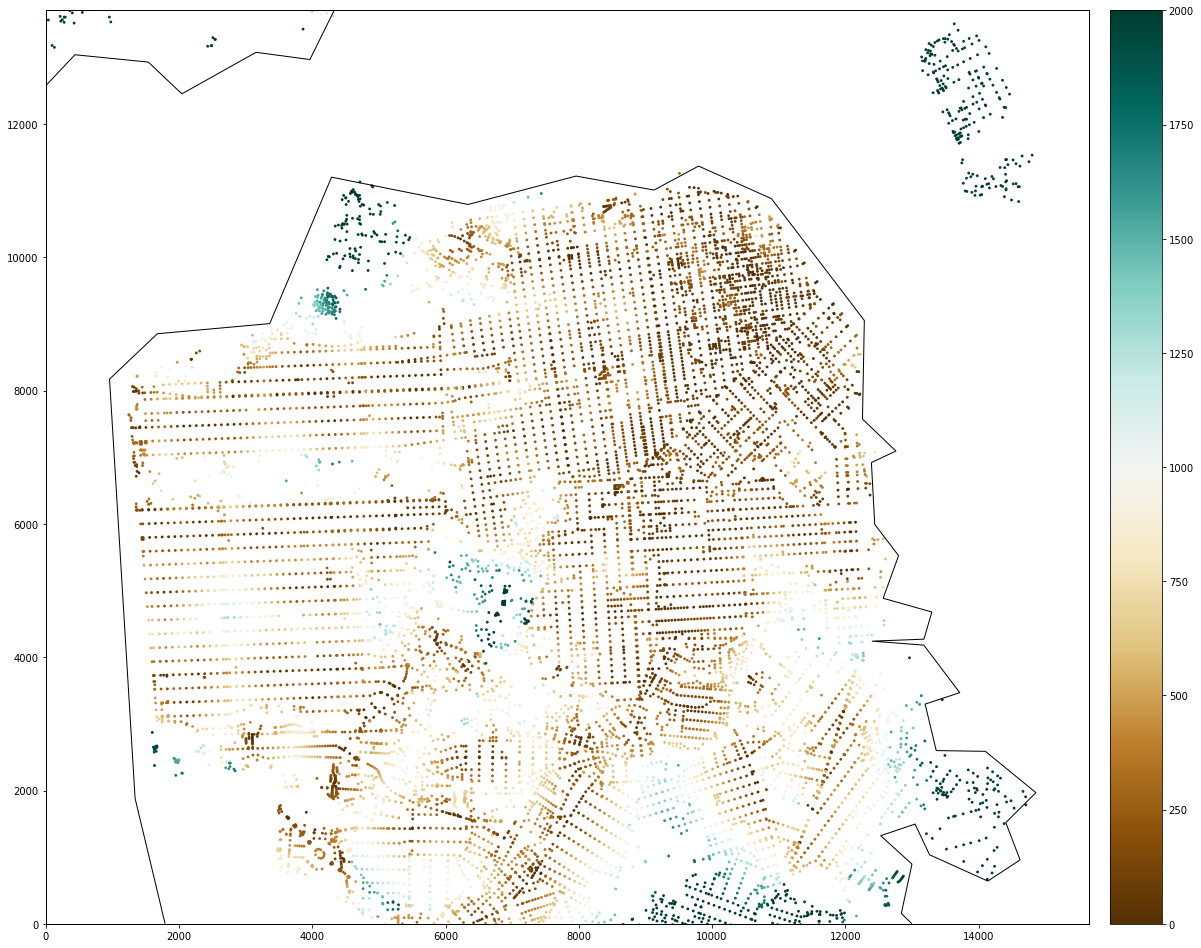

In [7]:
fig_kwargs = {'figsize': [20, 20]}
bmap_kwargs = {'suppress_ticks': False, 'resolution': 'h', 'epsg': '26943'}
plot_kwargs = {'cmap': 'BrBG', 's': 8, 'edgecolor': 'none'}

sf_tmp = [-122.524338, 37.707794, -122.34993, 37.834192]
tmp =    [-122.8662, 37.1373, -121.4798, 38.2158]
sf_bbox = [sf_tmp[1], sf_tmp[0], sf_tmp[3], sf_tmp[2]]

net.plot(a[1], bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Here's a map of the distance to the 5th nearest restaurant

(<mpl_toolkits.basemap.Basemap at 0x7f83dd61b2e8>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83dd64a7b8>)

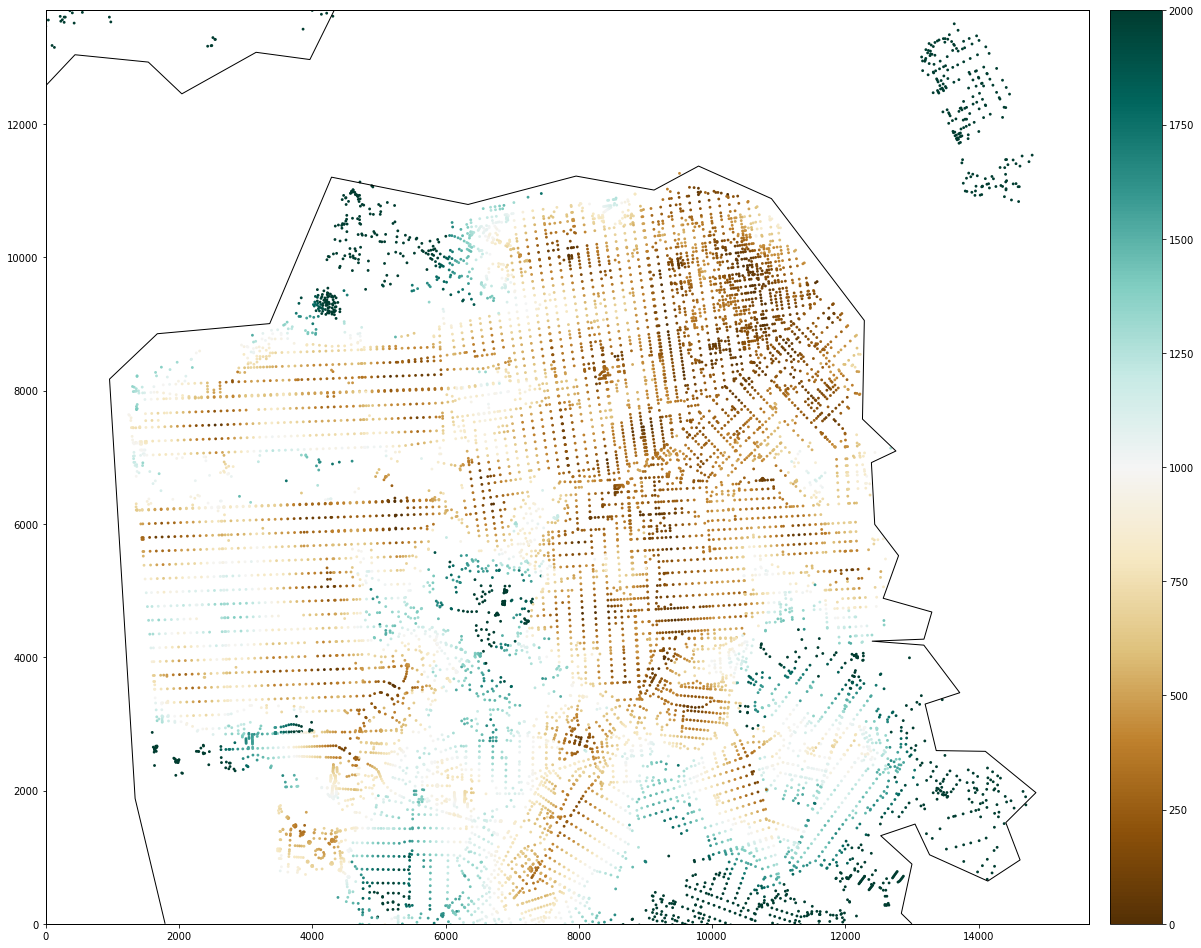

In [8]:
net.plot(a[5], bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Here's a map of the distance to the 10th nearest restaurant

(<mpl_toolkits.basemap.Basemap at 0x7f83dd4c1898>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83dd4f21d0>)

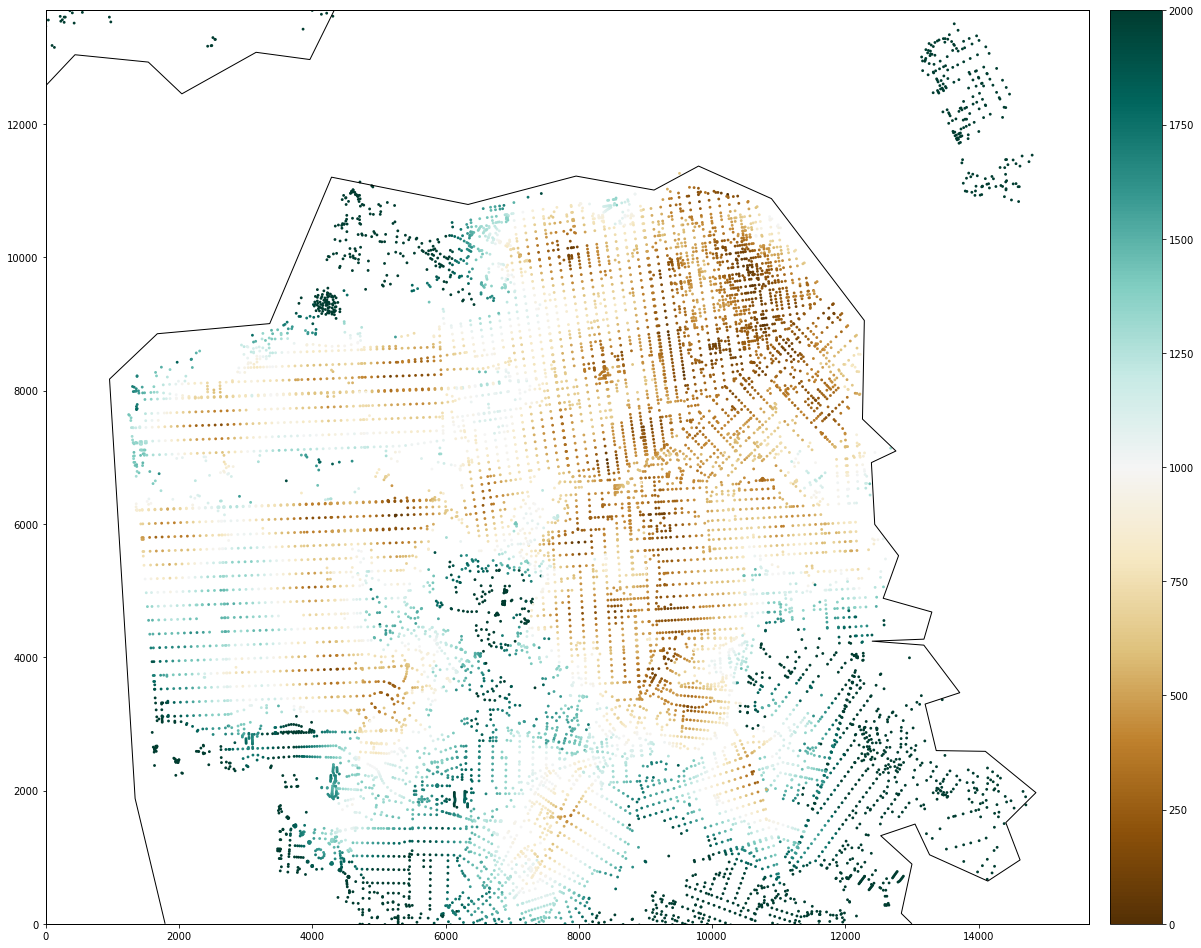

In [9]:
net.plot(a[10], bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

# A similar workflow is used to do general network aggregations

## Relate the x-ys to nodes

In [10]:
node_ids = net.get_node_ids(x, y)

## Assign the variable (in this case just location) to the network

In [11]:
net.set(node_ids)

## This is it - run the queries!

In [12]:
%time s = net.aggregate(500, type="sum", decay="linear")
%time t = net.aggregate(1000, type="sum", decay="linear")
%time u = net.aggregate(2000, type="sum", decay="linear")
%time v = net.aggregate(3000, type="sum", decay="linear")
%time w = net.aggregate(3000, type="count", decay="flat")

CPU times: user 1.14 s, sys: 11.4 ms, total: 1.15 s
Wall time: 197 ms
CPU times: user 1.31 s, sys: 12 ms, total: 1.32 s
Wall time: 201 ms
CPU times: user 1.76 s, sys: 2.94 ms, total: 1.77 s
Wall time: 263 ms
CPU times: user 2.4 s, sys: 0 ns, total: 2.4 s
Wall time: 361 ms
CPU times: user 2.51 s, sys: 8.29 ms, total: 2.52 s
Wall time: 405 ms


## Here's a map of access to restaurants with a 500m radius

(<mpl_toolkits.basemap.Basemap at 0x7f83db672080>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83dd3e7748>)

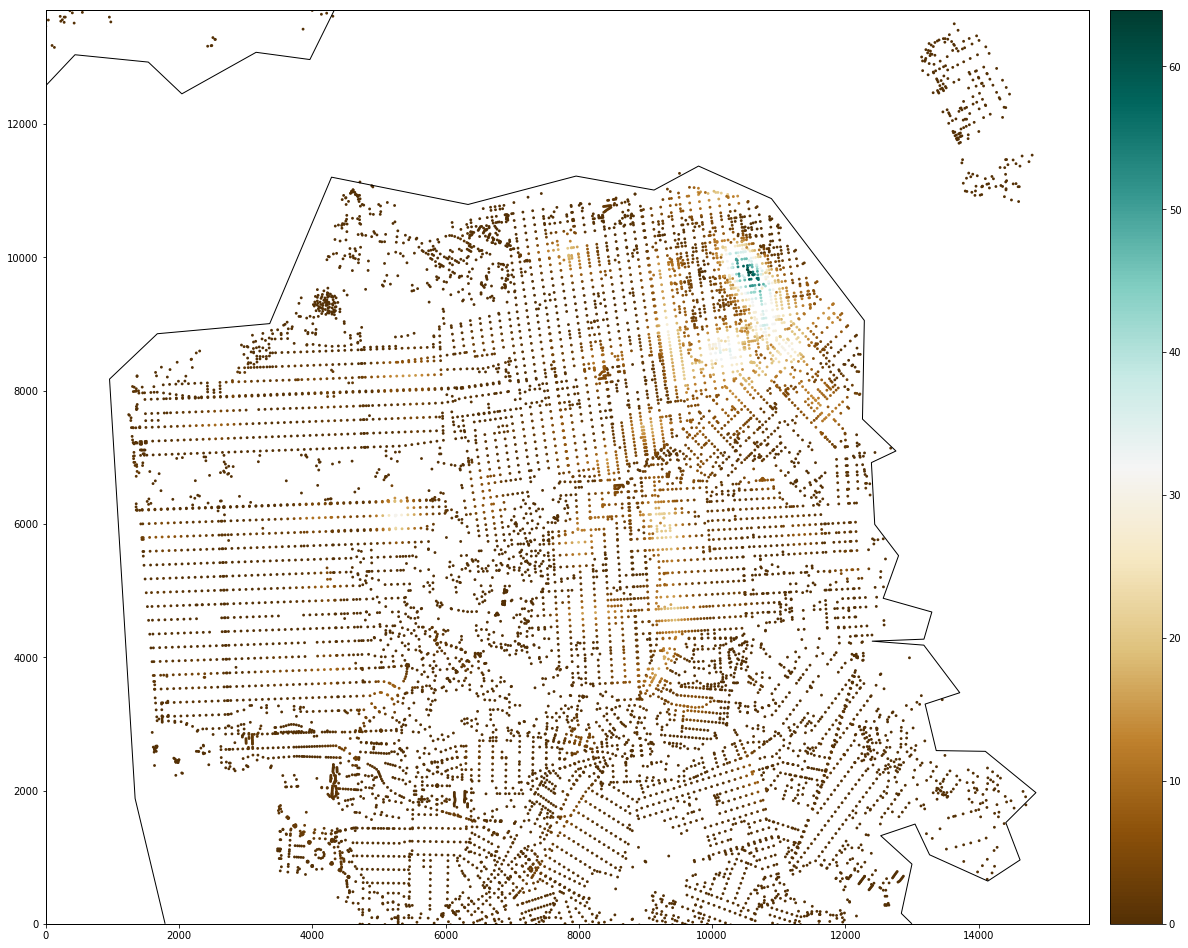

In [13]:
net.plot(s, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or 1000 meters

(<mpl_toolkits.basemap.Basemap at 0x7f83dd39aa58>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83db707860>)

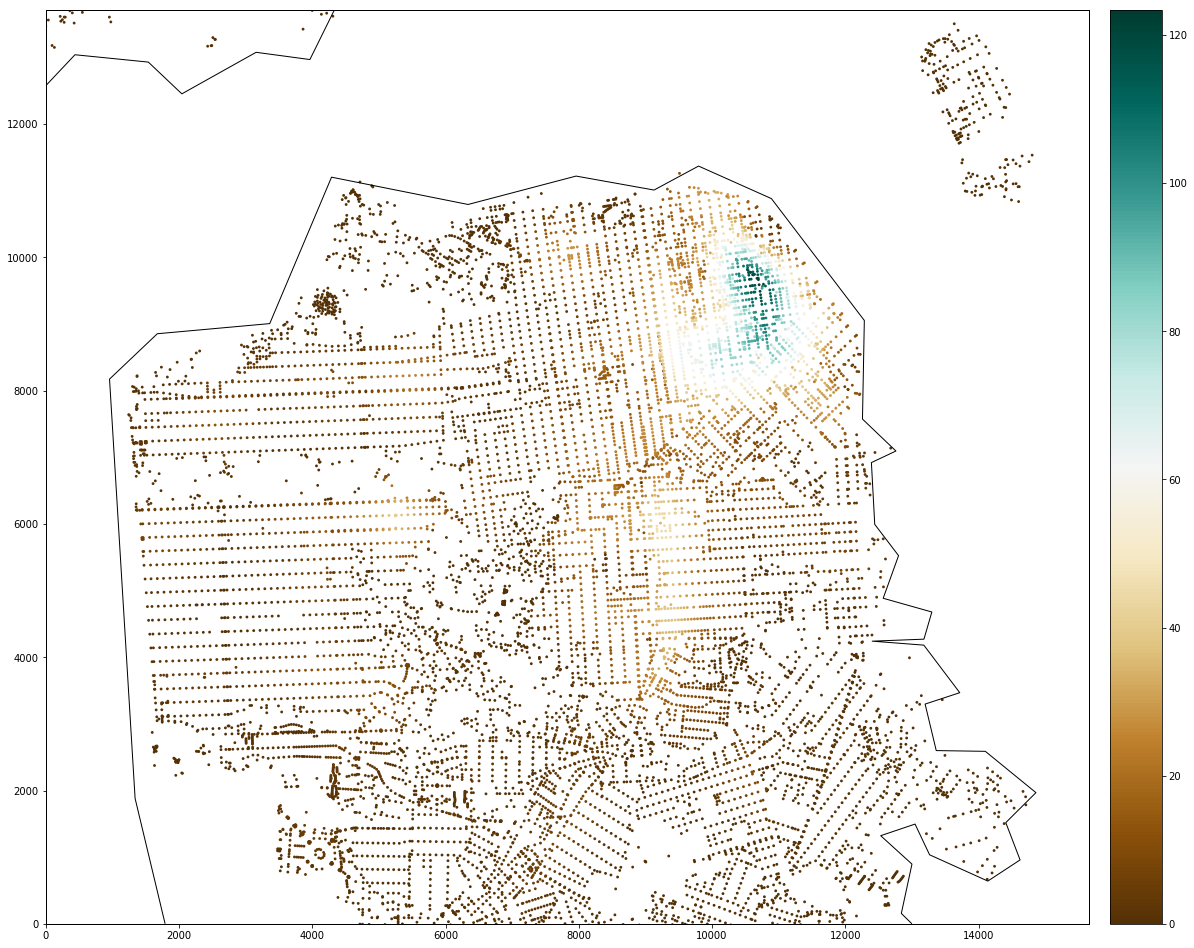

In [14]:
net.plot(t, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or 2000 meters radius

(<mpl_toolkits.basemap.Basemap at 0x7f83dd2425c0>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83db7a3da0>)

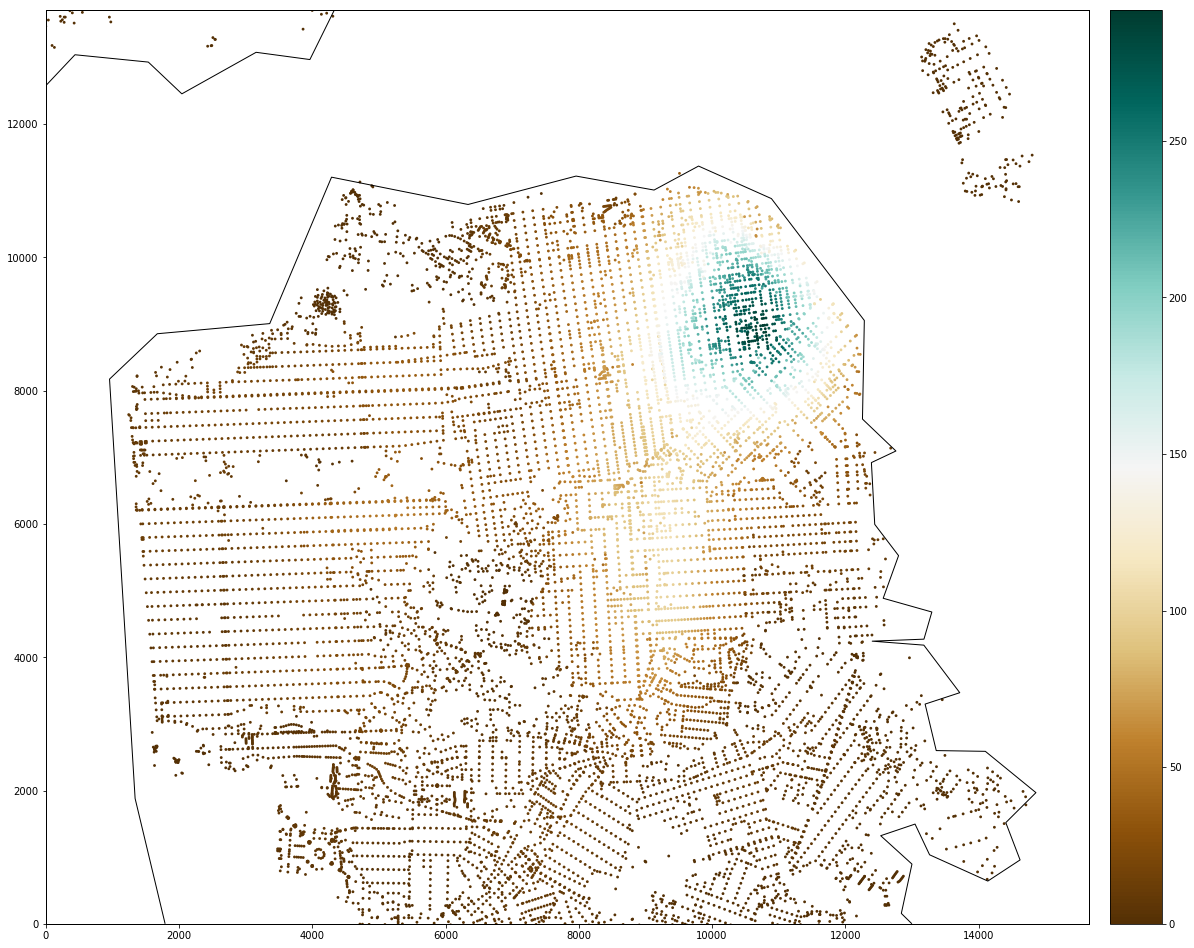

In [15]:
net.plot(u, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or 3000m radius

(<mpl_toolkits.basemap.Basemap at 0x7f83dd1a3c18>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83dd15a710>)

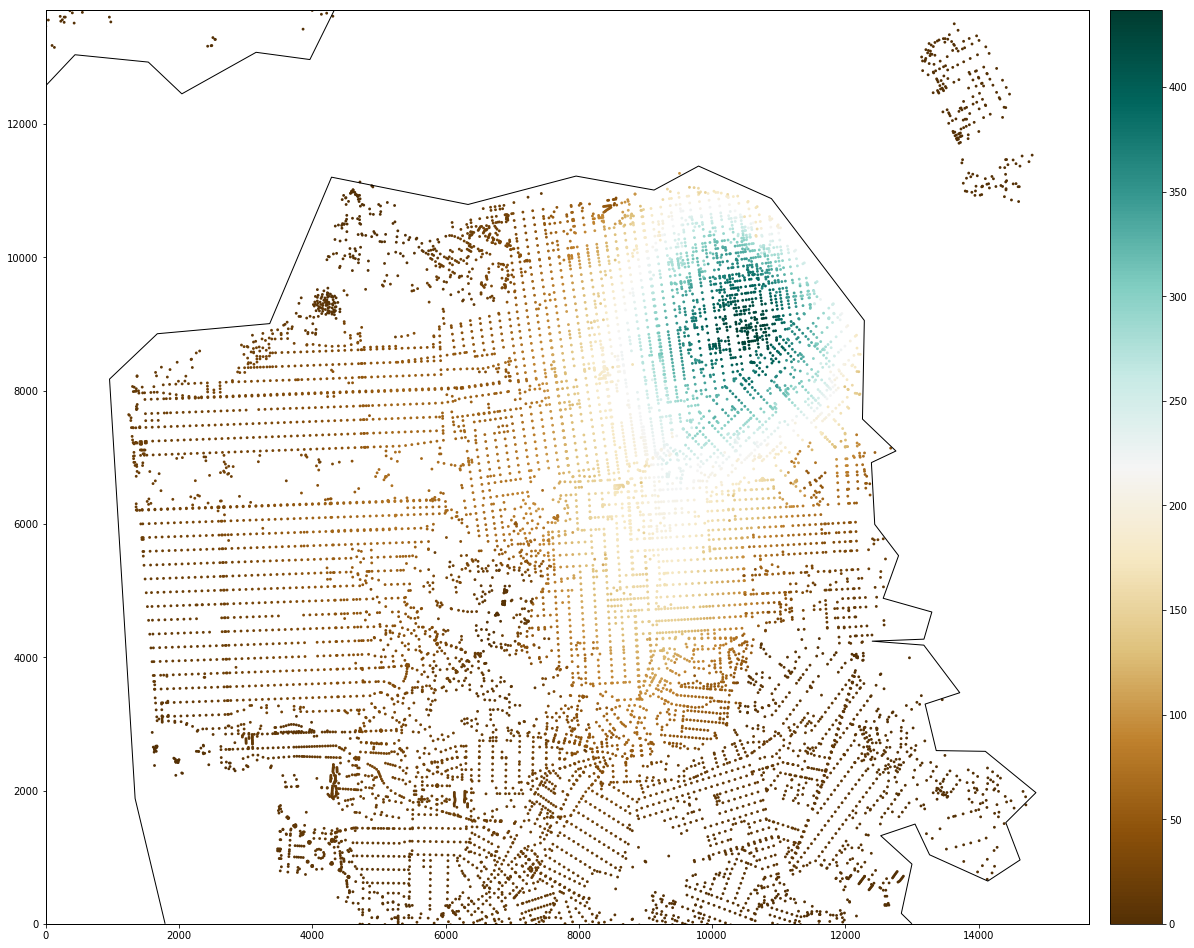

In [16]:
net.plot(v, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or the whole Bay Area region

(<mpl_toolkits.basemap.Basemap at 0x7f83db80b0f0>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83dd085828>)

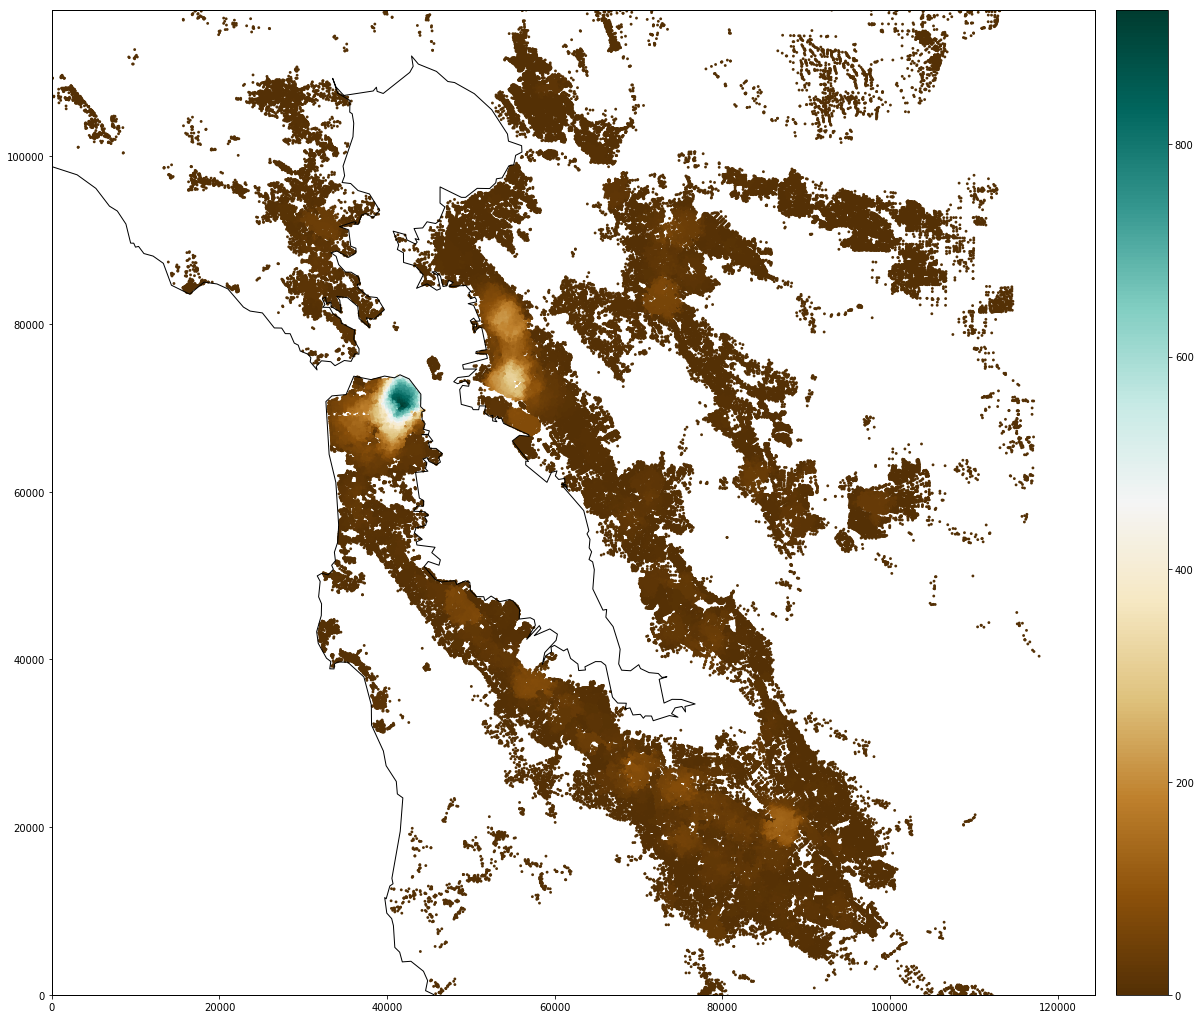

In [17]:
net.plot(w, bbox=bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)